Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

Do not remove any cell from the notebook you downloaded. You can add any number of cells (and remove them if not more necessary).

Do not leave any variable initialized to None.

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

## Make sure to name your notebook file (.ipynb) correctly:
### - LAB1_NAMESURNAME_ID (E.g. : LAB1_MARIOROSSI_2204567)

## Fill in your name, surname and id number (numero matricola) below:

In [547]:
NAME = "NIHALSURI"
ID_number = int("2141819")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

### Probability review: 
In this lab you are going to write some simple Python code and explore basic concepts about discrete and continuous random variables. 

__Probability__

You are going to play with:
- discrete r.v. 
- expected value vs empirical mean (Law of Large Numbers - LLN)
- continuous r.v.
- Central Limit Theorem - CLT

__Python__

You are going to use/see examples of:
- classes and objects
- f-strings
- lambda functions
- decorators
- fast vs slow code

Here are some very useful references (you can have a look at them later):  
- Sci-kit complete documentation:
    - [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)
- Sci-kit tutorials:
    - [https://scikit-learn.org/stable/tutorial/index.html](https://scikit-learn.org/stable/tutorial/index.html)
- Sci-kit cheat sheet (which algorithm to choose):
    - [https://scikit-learn.org/stable/tutorial/machine_learning_map/](https://scikit-learn.org/stable/tutorial/machine_learning_map/)
- other cheat sheets:
    - https://drive.google.com/drive/folders/0B4mZL0N1f9staUNOUi1RZ3hOdW8

In [548]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook we will use simple random variables: dice rolls.
Let's create a class `Dice()`.

In [549]:
faces = [x for x in range(1, 7)]

# note the difference
print("This is a 6 faces dice: {faces}")
print(f"This is a 6 faces dice: {faces}")

This is a 6 faces dice: {faces}
This is a 6 faces dice: [1, 2, 3, 4, 5, 6]


Python remarks:
- Please note the inline `for`.
- The ones above are 'formatted string literals' (also called f-strings for short), that let you include the value of Python expressions (such as variables and functions) inside a string by prefixing the string with `f` or `F` and writing expressions within curly brackets as `{expression}`.

In [550]:
fair_distribution = np.array([1 for _ in range(len(faces))])
not_fair_distribution = np.array([i for i in range(len(faces))])
# normalize the distributions (sum = 1)

fair_distribution = fair_distribution / sum(fair_distribution)
not_fair_distribution = not_fair_distribution / sum(not_fair_distribution)

class Dice():
    def __init__(self, faces, distribution=None):
        self.faces = faces 
        if distribution is not None:
            if distribution.size != len(faces):
                raise Exception('Uncompatible faces and distribution!')
            self.distribution = distribution / sum(distribution)
        else:
            # default to fair distribution
            self.distribution = np.array([1 for _ in range(len(faces))]) / len(faces)
            
    def throw(self, n_throws=1):
        return np.random.choice(self.faces, n_throws, replace=True, p=self.distribution)
    
fair_dice = Dice(faces, fair_distribution)
not_fair_dice = Dice(faces, not_fair_distribution)

Python remarks:
- Note the structure of the simple class `Dice()`. `__init__` is the initializer method (the constructor): each instance of the class will have fields `faces` and `distribution`.

In [551]:
fair_dice.throw()

array([6])

In [552]:
fair_dice.throw(10)

array([1, 2, 6, 6, 3, 1, 2, 2, 4, 2])

In [553]:
not_fair_dice.throw(10)

array([5, 6, 4, 6, 3, 6, 3, 5, 6, 4])

### Computing the expected value when probabilities are known
For ease of notation let's define the probability of obtaining the $i$-th face of the dice as $p(X=i)$, therefore the event "we throw the dice and get the $i$-th face" is described by $p(X=i)$ (we use $i$ to describe the possible outcomes of the random variable $X$).
By definition of expected value we have:

\begin{equation}
\mathbf{E}[X] := \mu := \sum_{i=1}^F
p(X=i) \cdot i
\end{equation}

__Note:__  This holds for any number of faces ($F$)

### Estimating the expected value when probabilities are unknown

Say that we can roll the dice $m$ times, call each single realization $x_j$ with $j=1,2,...,m$. We can approximate the expected value using the empirical average:

\begin{align}
\hat{\mu} &:= \frac{1}{m} \sum_{j=1}^m x_j & (1) \\
          &= \frac{1}{m} \sum_{i=1}^F \Big[ \sum_{z=1}^{m_i} x_{i , z} \Big] & (2) \\
          &= \frac{1}{m} \sum_{i=1}^F \Big[ \sum_{z=1}^{m_i} \mathbb{1}[x_{i,z}==i] * i \Big] & (3) \\
          &= \sum_{i=1}^F \Big[ \frac{i}{m}  \sum_{z=1}^{m_i} \mathbb{1}[x_{i,z}==i] \Big] \\
          &= \sum_{i=1}^F  \frac{m_i}{m} i & (4) \\
          &= \sum_{i=1}^F  \hat{p}(X=i)\cdot i & (5) \\
\end{align}

What are we doing here? 

$(1)$ This is the definition of empirical average.

$(2)$ We switch to a double indexing: each realization is now $x_{i, z}$, where $i \in \{1,...,F\}$ indicates the face, and $z \in \{1,...,m_i\}$ is an incremental index used to distinguish the $m_i$ realizations with the same $i$. In other words, we put the realizations inside $F$ bins: $i$ is the index of the bin, $z$ is the subindex used inside the bin. For example:

\begin{equation*}
     \begin{bmatrix}
     2 & 3 & 2 & 2 & 5 & 3 & \\
     x_1 & x_2 & x_3 & x_4 & x_5 & x_6 \\ 
     x_{2,1} & x_{3,1} & x_{2,2} & x_{2,3} & x_{5,1} & x_{3,2}
     \end{bmatrix}
     \begin{aligned}
     & \leftarrow \text{sequence of realizations} \\
     & \leftarrow \text{indexing with } j \\ 
     & \leftarrow \text{indexing with } i,z
     \end{aligned}
\end{equation*}


$(3)$ Since all the realizations inside bin $i$ have the same value ($i$), we can use indicator variables:

\begin{equation*}
\mathbb{1}[\text{condition}] = \begin{cases} 1 \quad \text{if condition is True} \\ 0 \quad \text{otherwise} \end{cases}
\end{equation*}

\begin{equation*}
\mathbb{1}[x_{i,z}==i] = 1 \quad \forall z \in \{1, ..., m_i\},
\qquad
x_{i, z} = \mathbb{1}[x_{i,z}==i] * i.
\end{equation*}


$(4),(5)$ We see that the sample average is approximating the probability of each possible outcome: $$\frac{m_i}{m} = \hat{p}(X=i) \approx p(X=i)$$

Therefore we are approximating the true average $\mathbb{E}[X]$ using the definition of expected value replacing the unknown true distribution $p(X=i)$ with its empirical approximation $\frac{m_i}{m}$.

\begin{equation}
\mu = \sum_{i=1}^F p(X=i) i \approx \sum_{i=1}^F \frac{m_i}{m} i = \hat{\mu}
\end{equation}

__Final remark__: Under the assumption that we have enough outcomes (and that the sampling mechanism is not "degenerate") we can expect the approximation to become increasingly better (this is a straighforward application of LLN). 

### Hands-on! 
Let's now see how the approximation works by means of a simulation:

In [554]:
# TODO 1
# Assume you are given a Dice object and you know the probability of each face.
# Write a function that computes the true expected value of the Dice object.
def E(dice : Dice): # the colon after the arguments is used to specify the type of object
    '''
    Computes the expected value of a dice with faces from 1 to F. Implemented using the class Dice.
    :param dice: Dice object. You can access the field 'distribution'
    :return average: true expected value of the dice.
    '''
    # YOUR CODE HERE
    avg = sum(dice.distribution*dice.faces)
    # raise NotImplementedError() # Remove this line
    return avg

In [555]:
# In the following test we are assuming the fair_dice has not been overwritten (6 faces and uniform distribution)
assert np.isclose(E(fair_dice), 3.5)

In [556]:
# In the following we are formatting the f-string using :.2f (this is standard and common with other languages).
# In particular we are saying: display only 2 decimal digits from the float variable
print(f"Expected value of the fair dice is     : {E(fair_dice):.2f}")
print(f"Expected value of the not fair dice is : {E(not_fair_dice):.2f}")

Expected value of the fair dice is     : 3.50
Expected value of the not fair dice is : 4.67


In [557]:
# TODO 2
# Assume you are given a black-box Dice object, i.e. you don't known the probability of each face.
# Write a function that estimates the expected value of the Dice object:
# simulate m outcomes and evaluate the sample average.
def empirical_E(dice : Dice, m): 
    '''
    Approximates the expected value of a dice with faces from 1 to F using sample average. 
    Implemeted using the class Dice 
    :param dice: Dice object. You cannot access the field 'distribution'
    :param m: number of dice rolls
    :return average: sample average of the dice
    '''
    # YOUR CODE HERE
    mean = 0
    results = dice.throw(m)
    for i in dice.faces:
        mean += np.count_nonzero(results == i)*i/m
    # raise NotImplementedError() # Remove this line
    return mean

In [558]:
empirical_avg = empirical_E(fair_dice, 100000)
print(empirical_avg)
assert np.isclose(empirical_avg, 3.5, atol=0.1)

3.5039800000000003


In [559]:
n_throws = 100
print(f"The sample mean of the fair dice is     : {empirical_E(fair_dice, m=n_throws):.2f}")
print(f"The sample mean of the not fair dice is : {empirical_E(not_fair_dice, m=n_throws):.2f}")

The sample mean of the fair dice is     : 3.61
The sample mean of the not fair dice is : 4.56


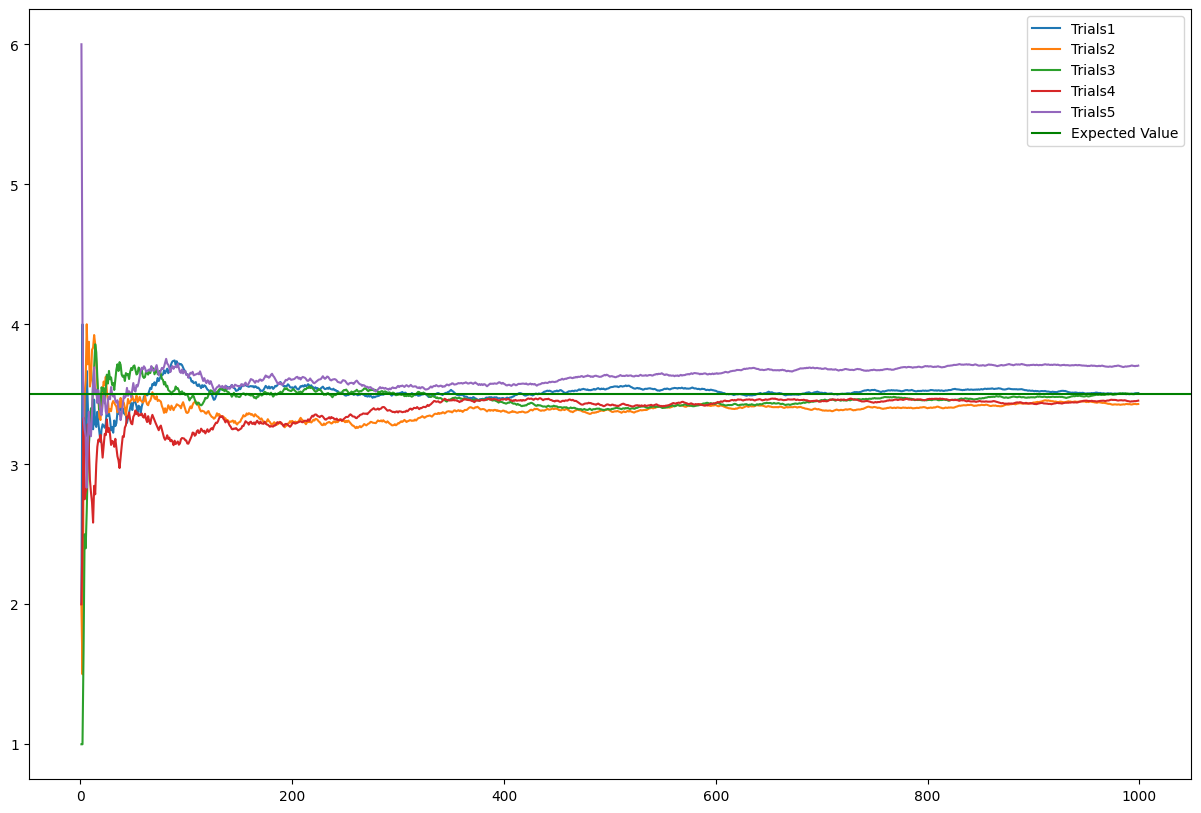

In [560]:
# TODO 3
# Let's compare the approximation error as a function of the number of dice rolls (to see the LLN in action).
# Create a plot with number of dice rolls (n_samples) on x-axis and sample average value (sample_averages) on y-axis. 
# Plot the sample average of multiple sequences of throws in the same figure.
# Show the convergence towards the true expected value (plotting a constant horizontal line). 
# To plot use the matplotlib.pyplot module, more precisely look at the documentation of plt.plot(...).

plt.figure(figsize=(15, 10)) # creates an empty figure

# we want to plot 5 independent sequences containing 1000 realizations (dice rolls) each.
n_samples = range(1, 1000)
n_trials = 5

for i in range(n_trials):
    outcomes, sample_averages = [], []
    for i_th_sample in n_samples:
        outcomes.append(fair_dice.throw(1)[0]) # we access the first element of the numpy array fair_dice.throw(1)
        sample_averages.append(sum(outcomes) / len(outcomes))


    # YOUR CODE HERE
    plt.plot(n_samples, sample_averages, label=f"Trials{i + 1}")

plt.axhline(y = E(fair_dice), color = 'g', linestyle = '-', label="Expected Value")
plt.legend()

    # raise NotImplementedError() # Remove this line

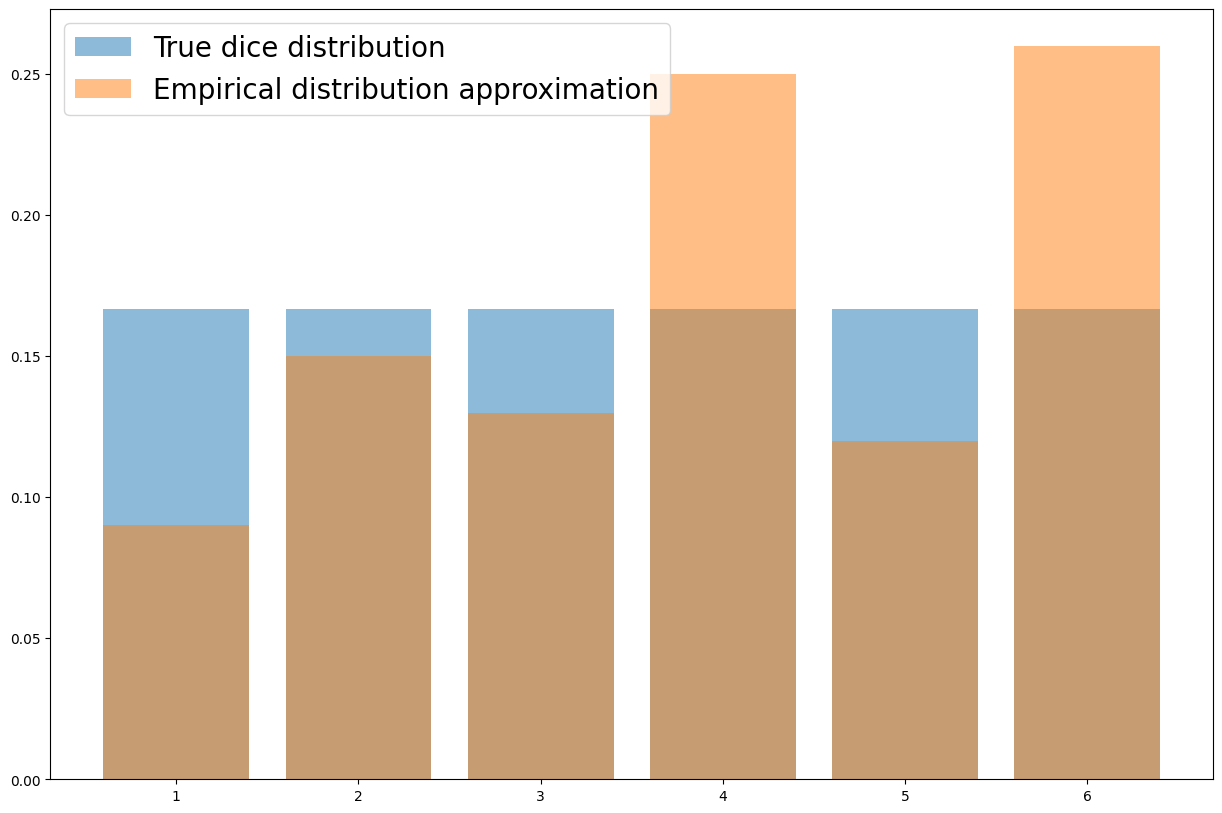

In [561]:
# TODO 4
# Let's compare the bin's distribution 
m = 100
# Have a look at the documentation and complete the following lines
# bins = np.linspace(#Add code)
# binning_count, bins = np.histogram(#Add code)

# try to modify the value of m (number of throws) and observe what happens

# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
bins = np.linspace(0, 7, num=7)
binning_count, bins = np.histogram(fair_dice.throw(m), bins)
# Normalize the counts to get approximate probabilities (since this is a discrete probability)
binning_count = binning_count / sum(binning_count)
plt.figure(figsize=(15, 10))
plt.bar(fair_dice.faces, fair_dice.distribution, alpha=0.5, label='True dice distribution')
plt.bar(fair_dice.faces, binning_count, alpha=0.5, label='Empirical distribution approximation')
plt.legend(fontsize=20)

# General approach for continuous densities

In order to represent a continuous random variable in the discrete, first we need to define $M$ partitions of its density domain. For example, if we consider a continuous scalar distribution $p(s)$ on the real line then we divide $\mathbb{R}$ in $M$ disjoint partitons $R_i$ s.t. $\bigcup_{i=1}^MR_i=\mathbb{R}$. There are no further particular restrictions on the regions $R_i$ (e.g. they do not have to be equally spaced). 

At this point, we can approximate a continuous probability distribution with a discrete one that has: 

$$P[ s \in R_i] = \int_{R_i} p(s) ds$$ 

### E.g. Gaussian r.v.

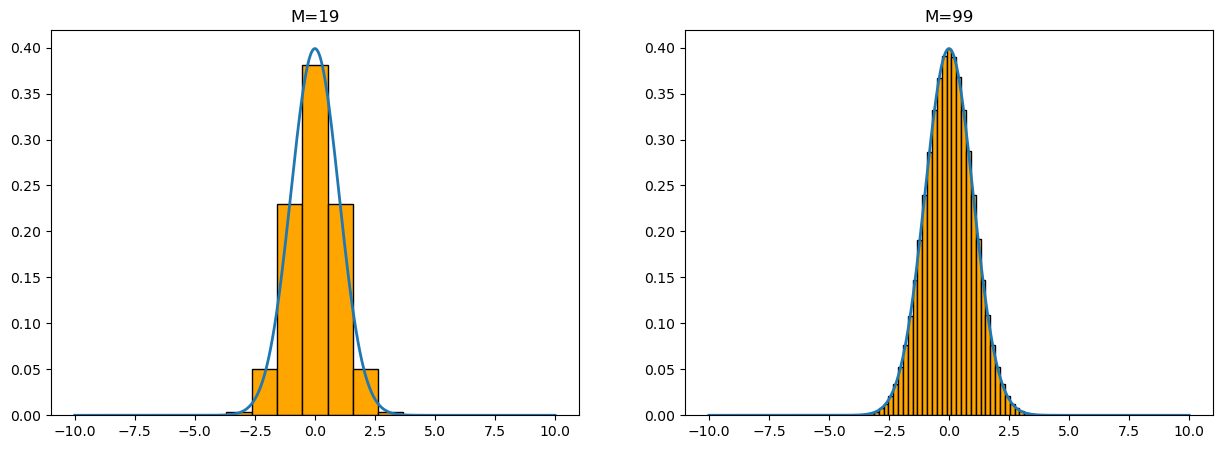

## Empirical density functions (histogram)

Now, suppose we have access to $m$ samples $s_1, s_2, \dots, s_m$ from an unknown continuous distribution $p(s)$. Since the distribution is unknown, we also don't know the shape of the density function. The density function is however a useful representation, since it often makes easy to get an understanding of the distribution, i.e. what are the values we can expect when sampling it. Therefore we are now interested in drawing an approximation of the density function for the unknown distribution. Of course the only information we have about the latter distribution is given by the $m$ samples, so how can we exploit them to draw a meaningful approximation of the density function?

Again, we need to divide the density domain of the unknown continuous distribution in $M$ regions. To ease the intuition we assume to deal with a r.v. on $\mathbb{R}$ and therefore we want $\bigcup_{i=1}^MR_i=\mathbb{R}$. 

Then, for each sample $s_i, \ i=1, \dots, m$ in our collection, we check which region it belongs to, and we add a discrete probability mass of $1/m$ to the corresponding region. This procedure result in a frequentist approximation (a histogram!) of the unknown density function, which is more and more "fine-grained" (i.e. it will look more and more like a continuous function) as $M$ increases. Be aware however that if $M$ is big we need many many samples (indeed it must hold that $m >> M$) to have an accurate estimation of the relative frequency for each region!

Let $f_m(R_i)$ be the relative frequency of the region $R_i$ (i.e. area of the corresponding rectangle in the histogram). Then we know that by the Law of Large numbers as $m$ goes to infinity we have:

$$f_m(R_i) \rightarrow  P[ s \in R_i] = \int_{R_i} p(s) ds$$ 

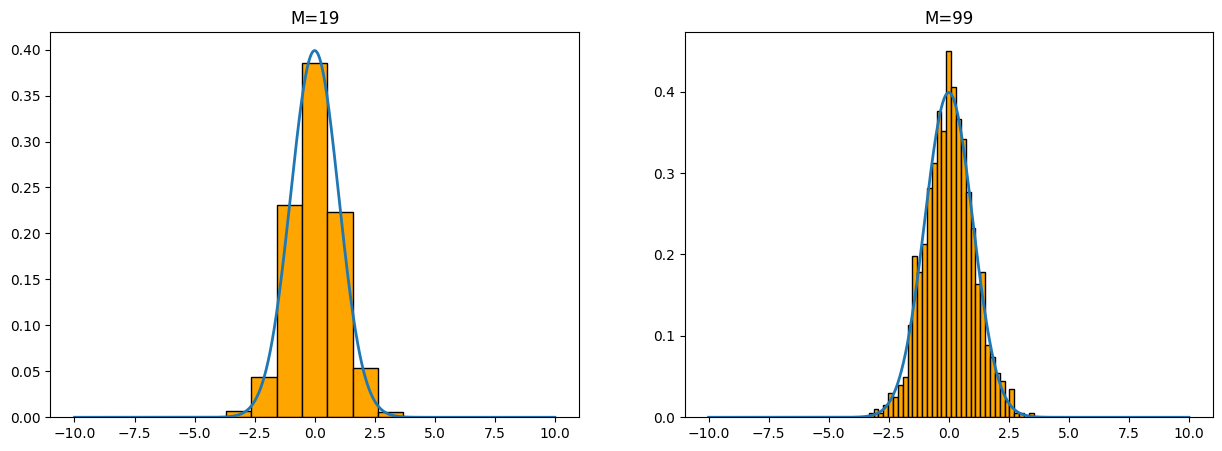

In [562]:
import scipy.stats as stats # for visualizing an "unknown" distribution

# Generate m samples from an "unknown" distribution (normal gaussian), think of them as given!
m = 1000
S = np.random.normal(0, 1, m)

# We define two sets of bins equally spaced between -10 and 10.
# The other two intervals are [-inf, -10] and [10, inf] and we will assign to them 0 probability.
bins_1 = np.linspace(-10, 10, 20)  # 19 bins
bins_2 = np.linspace(-10, 10, 100) # 99 bins

# Draw the empirical density function (the histogram)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(S, bins=bins_1, edgecolor='k', color='orange', density=True)
axs[1].hist(S, bins=bins_2, edgecolor='k', color='orange', density=True)

# Draw true "unknown" distribution
x_plot = np.linspace(-10, 10, 1000)
axs[0].plot(x_plot, stats.norm.pdf(x_plot, 0, 1), linewidth=2)
axs[0].title.set_text(f'M={bins_1.size-1}')
axs[1].plot(x_plot, stats.norm.pdf(x_plot, 0, 1), linewidth=2)
axs[1].title.set_text(f'M={bins_2.size-1}')
plt.show()

As you can see from the figure above, the more regions we use to devide the domain of the unknown density, the better we can visualize the distribution (assuming $m \gg M$).

## Central Limit Theorem

Let $X_1, ..., X_m$ be a sequence of i.i.d. random variables $\sim \mathcal{D}$ (where $\mathcal{D}$ is a generic distribution, in our case the dice distribution) with expected value $\mu$ and finite variance $\sigma^2$. Consider the sample average
$$ \hat{\mu}(X_1, ..., X_m) = \frac{1}{m} \sum_{i=1}^m X_i $$

The Law of Large Numbers tells us that $\hat{\mu}(X_1, ..., X_m)$ converges almost surely to $\mu$, the expectation of the underlying distribution.

The Central Limit Theorem allows us to say something more about the distribution of the sample average: averaging over infinitely many random variables one converges to a Gaussian distribution.

$$ \hat{\mu}(X_1,...,X_m) \simeq \mathcal{N} \left( \mu, \frac{\sigma^2}{m} \right) \quad \text{when} \ m \rightarrow \infty $$

### Sample average randomness

Remember the sample average $\hat{\mu}(X_1,...,X_m)$ is a random variable too. Therefore we can study its distribution, first moment, etc. 

Consider the following experiment: roll a dice $m$ times and repeat this procedure for $T$ times. We can compute the sample average on each batch composed by $m$ rolls (this is a random variable) and then we can look at the $T$ realizations of it.

The empirical average $\hat{\mu}(X_1,...,X_m)$ is a statistics of $(X_1,...,X_m)$, i.e. a function of the outcomes $(x_1, ..., x_m)$. With different realizations $(X_1=x_1, ..., X_m=x_m)$ we get different values of $\hat{\mu}$. Therefore we can write $\hat{\mu}$ as a random variable depending on the sequence of the i.i.d. random variables $(X_1, ..., X_m)$.

It is legitimate to ask ourself what is the distribution of $\hat{\mu}(X_1,...,X_m)$. The answer to that simple question is not trivial at all and depends on $\mathcal{D}$. A closed form expression for $\hat{\mu}(X_1,...,X_m)$ might not be easy to compute. Luckily for us $\hat{\mu}$ is a sum of i.i.d. r.v. and therefore we can apply the Central Limit Theorem we have seen in class (many other versions exist!). We can approximate its distribution using a gaussian random variable whose mean $a$ and variance $b$ are given by the following:

$$a = \mathbb{E}[\hat{\mu}(X_1,...,X_m)] \qquad b = Var [\hat{\mu}(X_1,...,X_m)]$$

Fortunately we can easily compute such quantities using basic properties of expected value and variance:

$$a = \mathbb{E}\Big[\frac{1}{m}\sum_{i=1}^m X_i\Big] = \frac{1}{m}\sum_{i=1}^m \mathbb{E}[X_i] = \mu$$
$$b = Var \Big[\frac{1}{m}\sum_{i=1}^m X_i\Big] = \frac{1}{m^2}\sum_{i=1}^m Var \Big[X_i\Big] = \frac{\sigma^2}{m}$$

We want to plot the limit distribution $\mathcal{N}(a,b)$. In order to compute $b$ we need $\sigma^2 = \mathbb{E}[(X - \mu)^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$. We now write a function that returns the $p$-th moment of the input random variable, and we use it to compute $\mathbb{E}[X^2]$.

In [563]:
# TODO 5
# Write a function that returns the p-th moment of a Dice object with known face distribution.
def moment(order : int, dice : Dice):
    '''
    Computes the p-th moment of a dice with faces from 1 to F. Implemeted using the class Dice
    :param order: integer representing the moment order
    :param dice: Dice object. You can access the field 'distribution'
    :return moment: the computed moment
    '''
    # YOUR CODE HERE
    # moment is the power that E[x^] is put to
    # first moment is expected value, second moment is variance 
    # moment = sum(dice.distribution*(dice.faces)**order)
    moment = 0
    for x in range(len(dice.faces)):
        moment += (dice.distribution[x])*(dice.faces[x]**order)

    return moment

# TODO 6
# Write a function that computes the expected value of a generic function f applied to an object Dice.
# We will use it to test the above function 'moment()'.
def expected_value_f(f, dice : Dice):
    '''
    Computing expected value of a general function applied to the faces (from 1 to F) of a dice. Implemeted using the 
    class Dice
    :param f: function to be applied to the random variable
    :param dice: Dice object 
    :return average: expected value of the dice
    '''
    # YOUR CODE HERE
    # we're trying to calculate E[f(x)] here 
    summation = 0 
    for x in range(len(dice.faces)):
        summation += (dice.distribution[x])*(f(dice.faces[x]))
    
    return summation

In [564]:
# Let's generate the random variable X
n_faces, m, T = 6, 100, 10000
dice = Dice([x for x in range(1, n_faces + 1)])

In [565]:
# Let's compare the two functions (see the use of the lambda function).
# Lambda functions are as other functions but they can be defined using a compact synthax (one line long).
# If you need more than one line to define your function it probably means you should not be using a lambda
print(moment(0, dice), expected_value_f(lambda x : x**0, dice))
print(moment(1, dice), expected_value_f(lambda x : x**1, dice))
print(moment(2, dice), expected_value_f(lambda x : x**2, dice))
print(expected_value_f(lambda x : np.log(x), dice))

assert np.isclose(moment(0, dice),                         1., atol=0.01)
assert np.isclose(expected_value_f(lambda x : x**0, dice), 1., atol=0.01)
assert np.isclose(moment(1, dice),                         3.5, atol=0.01)
assert np.isclose(expected_value_f(lambda x : x**1, dice), 3.5, atol=0.01)
assert np.isclose(moment(2, dice),                         15.166, atol=0.01)
assert np.isclose(expected_value_f(lambda x : x**2, dice), 15.166, atol=0.01)
assert np.isclose(expected_value_f(lambda x : np.log(x), dice), 1.096, atol=0.01)

0.9999999999999999 0.9999999999999999
3.5 3.5
15.166666666666666 15.166666666666666
1.0965418686683501


We now want to empirically verify the CLT.

To do so, we estimate the probability distribution of the sample average $\hat{\mu}(X_1,...,X_m)$ using the same approach as before. Recall the experiment described above: roll a dice $m$ times and repeat this procedure for $T$ times. We can compute the sample average on each batch composed by $m$ rolls (this is a realization of $\hat{\mu}$) and then we can use the $T$ realizations to build an histogram.

In [566]:
# Let's generate some realization of the random variable $\hat{\mu}$
sample_average_realizations = []
for t in range(T):
    sample_average_realizations.append(empirical_E(dice, m=m))

Text(0.5, 1.0, 'Averaging 100 dice rolls and repeating it for 10000 times')

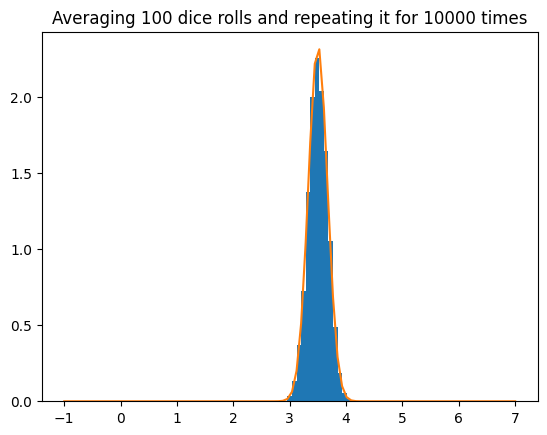

In [567]:
# TODO 7
# Let's plot the distribution of the sample average random variable. Consider for example 100 bins
# Browse the documentation and complete the following 2 lines.
# > bins = np.linspace(Add your code here)
# > plt.hist(Add your code here)
# Set the argument'density'=True so that we can compare it with a gaussian distribution with mean a and variance b

# YOUR CODE HERE
bins = np.linspace(-1, 7, num = 100)
plt.hist(sample_average_realizations, bins, density=True)
# Let's compare the empirical distribution of the sample average with the Central Limit Theorem distribution (gaussian)
x = np.linspace(min(bins), max(bins), 100)
a = E(dice)
b = np.sqrt((moment(2, dice) - moment(1, dice)**2) / m) # why is /m added here, but its not a part of the formula? 
plt.plot(x, stats.norm.pdf(x, a, b))
plt.title(f'Averaging {m} dice rolls and repeating it for {T} times')

Play a little bit with $m$ and $T$ and see how this affects the shape of the distribution, its mean and variance.

In [568]:
# What is the mean and variance of the empirical distribution showed in the histogram?
print(f"Average from the histogram realizations:  {np.array(sample_average_realizations).mean():.5f}")
print(f"Variance from the histogram realizations: {np.array(sample_average_realizations).var():.5f}")

Average from the histogram realizations:  3.50107
Variance from the histogram realizations: 0.02934


In [569]:
print(f"Expected value of hat{{mu}}: a = {E(dice)}")
print(f"Variance value of hat{{mu}}: b = {(moment(2, dice) - moment(1, dice)**2) / m}")
print(f"Variance value of hat{{mu}}: b = {expected_value_f(lambda x: (x - E(dice))**2, dice) / m}")
# Note these values are very close the their empirical counterparts estimated using the histogram

Expected value of hat{mu}: a = 3.5
Variance value of hat{mu}: b = 0.02916666666666666
Variance value of hat{mu}: b = 0.029166666666666664


We now want to visualize the convergence of the sample average $\hat{\mu}(X_1,...,X_m)$ to $\mathcal{N} \left( \mu, \frac{\sigma^2}{m} \right)$ as a function of the number of samples $m$.

Do the same as in TODO 3, but: 1) use the unfair dice, 2) plot also the confidence interval $\pm 2 \sqrt{b}$.

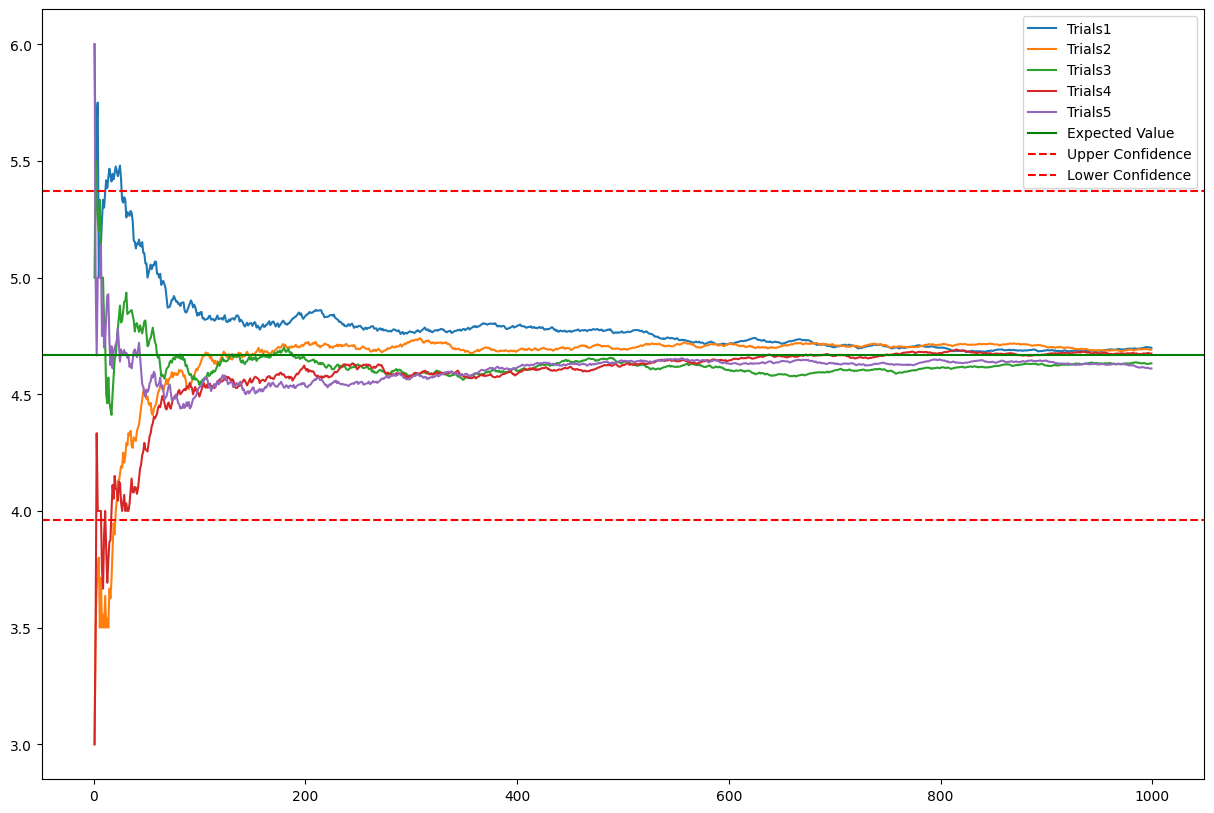

In [570]:
# TODO 8
# Let's plot the mean and variance of the sample average $\hat{\mu}$ as a function of the number of samples m.
# Same as TODO 3:
#    Create a plot with number of dice rolls (n_samples) on x-axis and sample average value (sample_averages) on y-axis. 
#    Plot the sample average of multiple sequences of throws in the same figure.
#    Show the convergence towards the true expected value (plotting a constant horizontal line).
# New:
#    Plot also the 2*\sqrt{b} confidence interval.

plt.figure(figsize=(15, 10))

# we want to plot 5 independent sequences containing 1000 realizations (dice rolls) each.
n_samples = range(1, 1000)
n_trials = 5

# edit the code of TODO 3:
# - use not_fair_dice
# - plot also the confidence interval [\mu - 2*\sqrt{b}, \mu + 2*\sqrt{b}] 

# YOUR CODE HERE
a = E(not_fair_dice)
b = np.sqrt((moment(2, not_fair_dice) - moment(1, not_fair_dice)**2) / m)
confidence = 2*np.sqrt(b)
for i in range(n_trials):
    outcomes, sample_averages = [], []
    for i_th_sample in n_samples:
        outcomes.append(not_fair_dice.throw(1)[0]) # we access the first element of the numpy array fair_dice.throw(1)
        sample_averages.append(sum(outcomes) / len(outcomes))


    # YOUR CODE HERE
    plt.plot(n_samples, sample_averages, label=f"Trials{i + 1}")

plt.axhline(y = E(not_fair_dice), color = 'g', linestyle = '-', label="Expected Value")
plt.axhline(y = a + confidence, color = 'r', linestyle = '--', label= "Upper Confidence")
plt.axhline(y = a - confidence, color = 'r', linestyle = '--', label= "Lower Confidence")

plt.legend()

# Extra exercises

In the following some small variations of the above exercises are proposed to practice with python.

### Dice with high number of edges

In [571]:
# Let's now create a dice to play D&D (20 faces)
n_faces = 20
DandDdice = Dice([x for x in range(1, n_faces + 1)])

In [572]:
print(f"Expected value of the fair dice is     : {E(DandDdice):.2f}")
n_throws = 100
print(f"Sample average of the fair dice is     : {empirical_E(DandDdice, m=n_throws):.2f}")

Expected value of the fair dice is     : 10.50
Sample average of the fair dice is     : 10.78


In [573]:
# TODO 9
# Let's copy the code from above and create a function to plot the sample average approximation error
# as a function of the number of throws
def plot_approximation_error(dice: Dice, m):
    '''
    Plot empirical average approximation error for a given dice and number of throws.
    This function does not create a new plt.figure() so that we can plot multiple realizations on the same plot
    :param m: Number of throws
    '''
    # Let's compare the approximation error as a function of the number of throws (to see the LLN in action)

    # YOUR CODE HERE
    plt.figure(figsize=(15, 10)) # creates an empty figure

    # we want to plot 5 independent sequences containing 1000 realizations (dice rolls) each.
    n_samples = range(1, m)
    outcomes, sample_averages = [], []
    for i_th_sample in n_samples:
        outcomes.append(dice.throw(1)[0])
        sample_averages.append(sum(outcomes) / len(outcomes))

    plt.plot(n_samples, sample_averages, label="Trial")
    plt.axhline(y=E(dice), color='g', linestyle='-', label="Expected Value")
    plt.legend()


    
    

[None, None, None, None]

<Figure size 1500x1000 with 0 Axes>

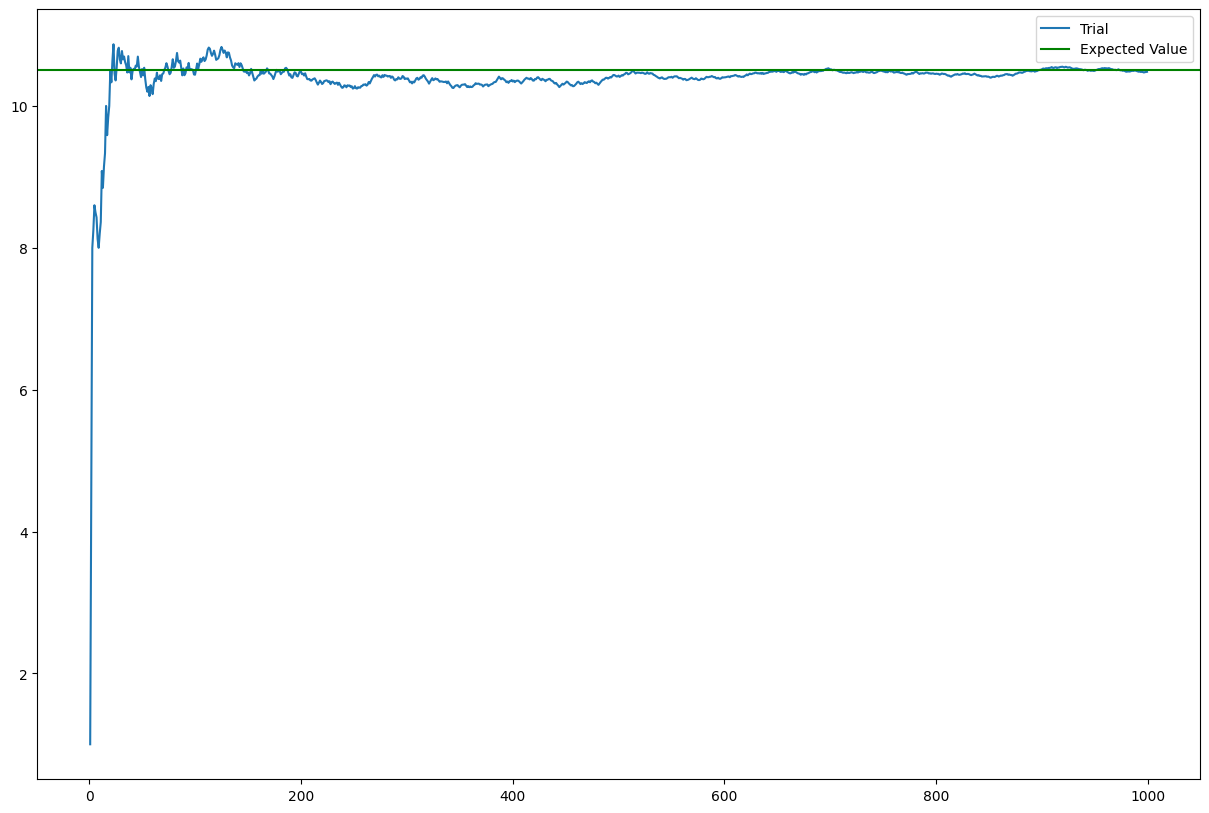

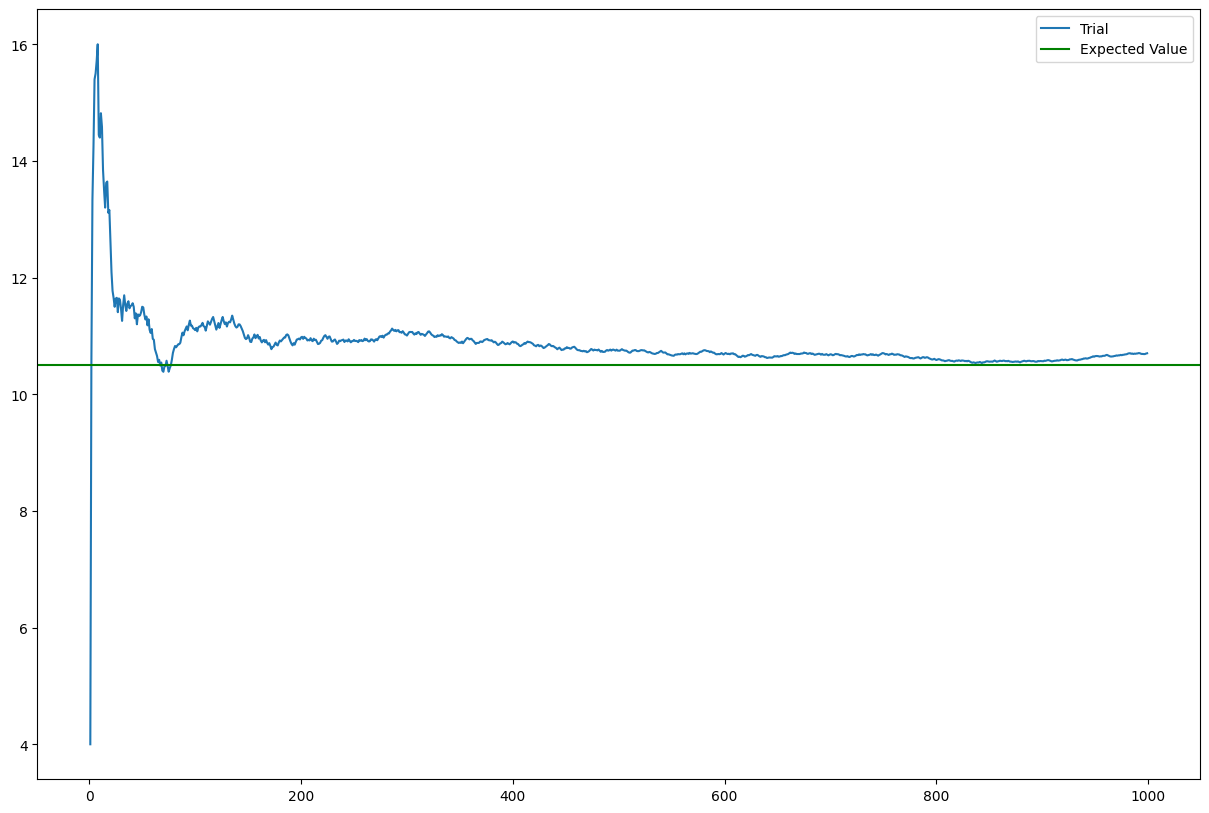

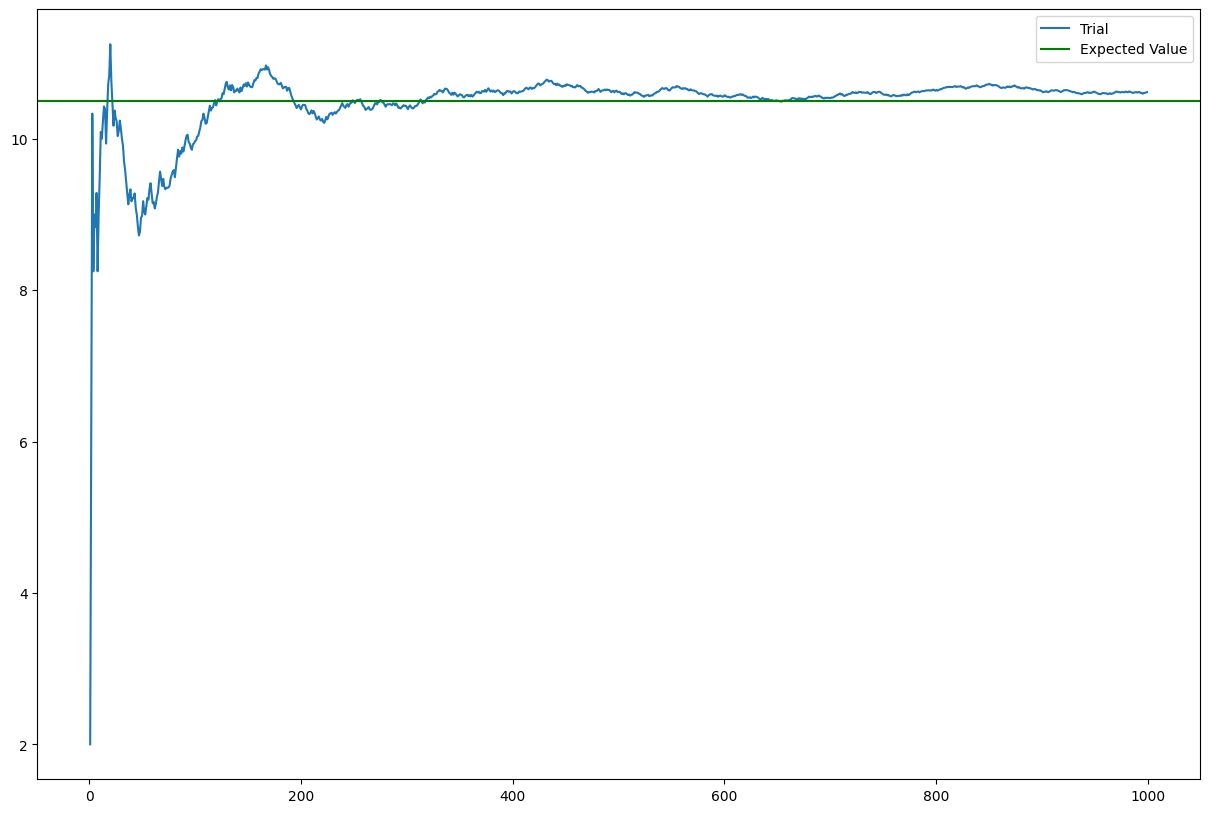

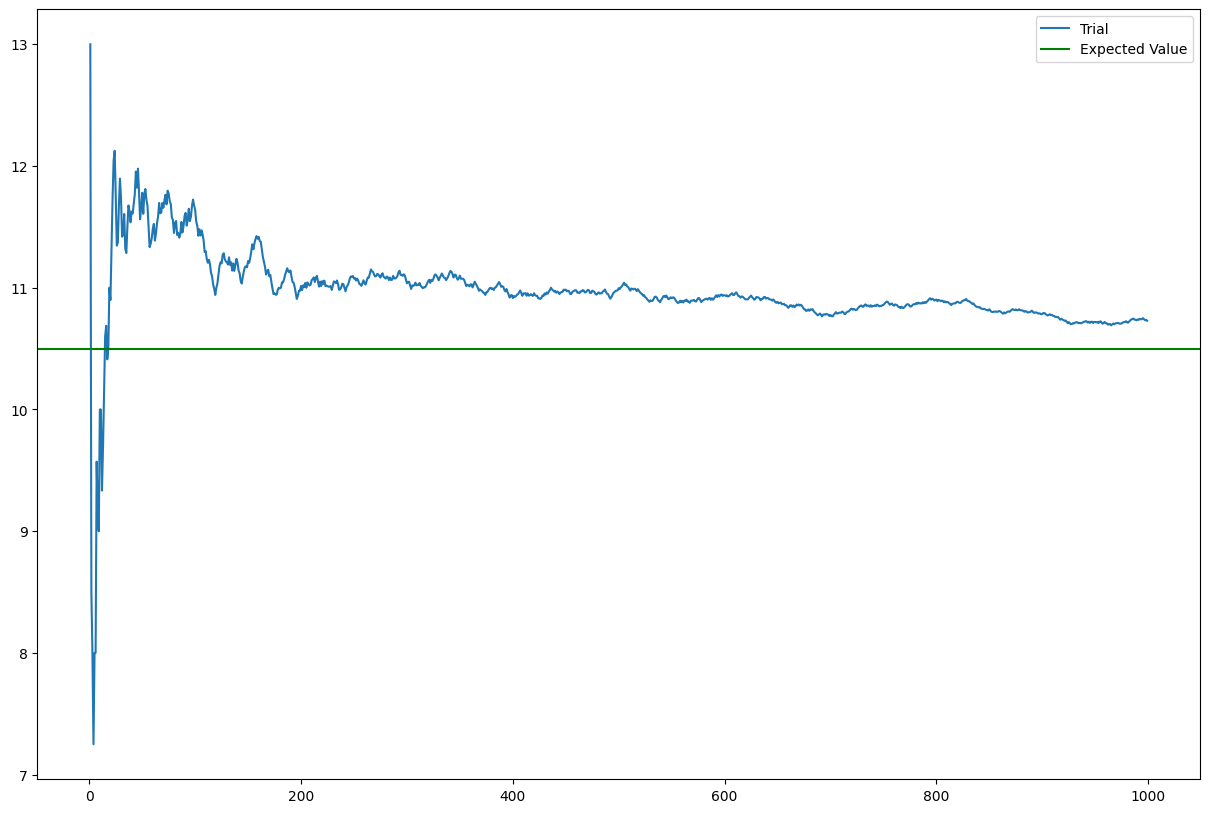

In [574]:
# Compare different realizations of the sample average 
plt.figure(figsize=(15, 10))
# plot_approximation_error(DandDdice, m=1000)
# plot_approximation_error(DandDdice, m=1000)
# plot_approximation_error(DandDdice, m=1000)
# plot_approximation_error(DandDdice, m=1000)
# You can do the same using the following more compact expression
[plot_approximation_error(DandDdice, m=1000) for _ in range(4)]

<Figure size 1500x1000 with 0 Axes>

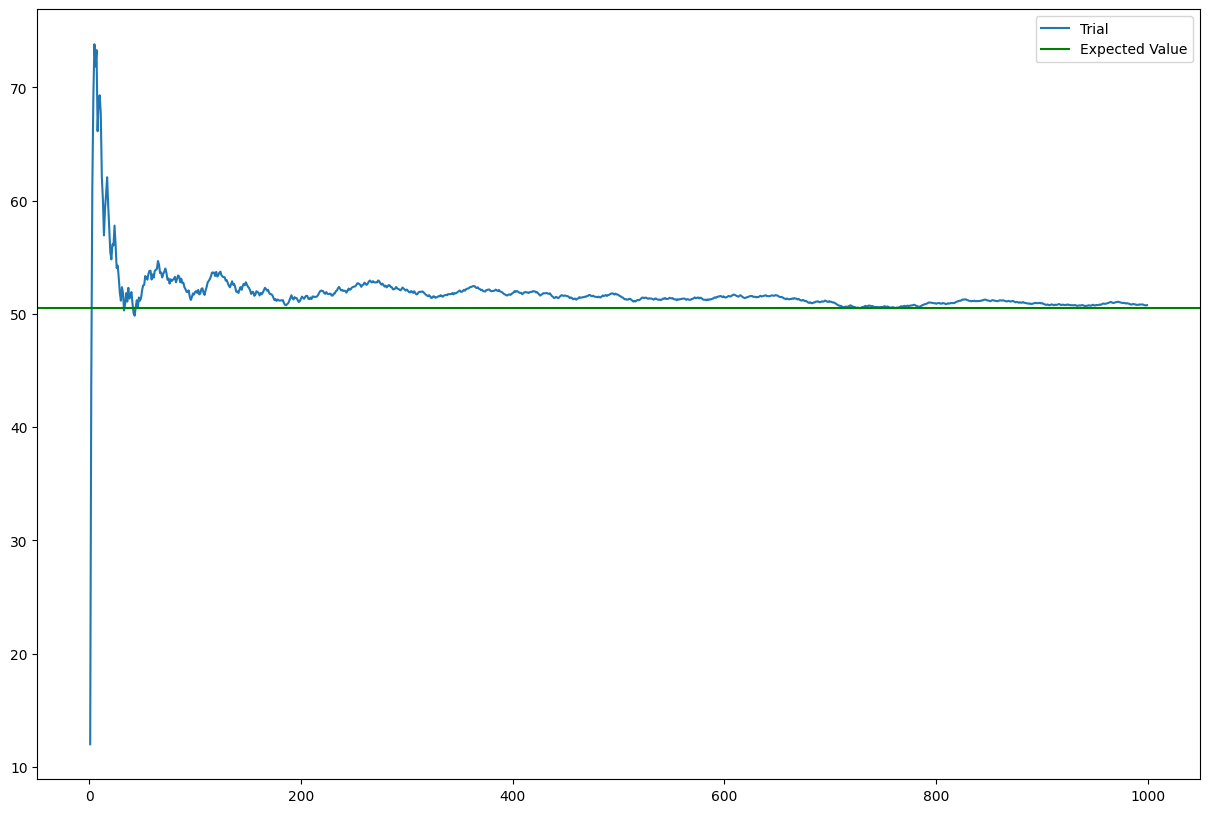

In [575]:
DandDdice = Dice([x for x in range(1, 100 + 1)])
plt.figure(figsize=(15, 10))
plot_approximation_error(DandDdice, m=1000)

Now try to create a not fair dice (try with different number of faces, e.g. 50, 100, ...) and plot the convergence of the empirical approximation of the expected value to the expected value.

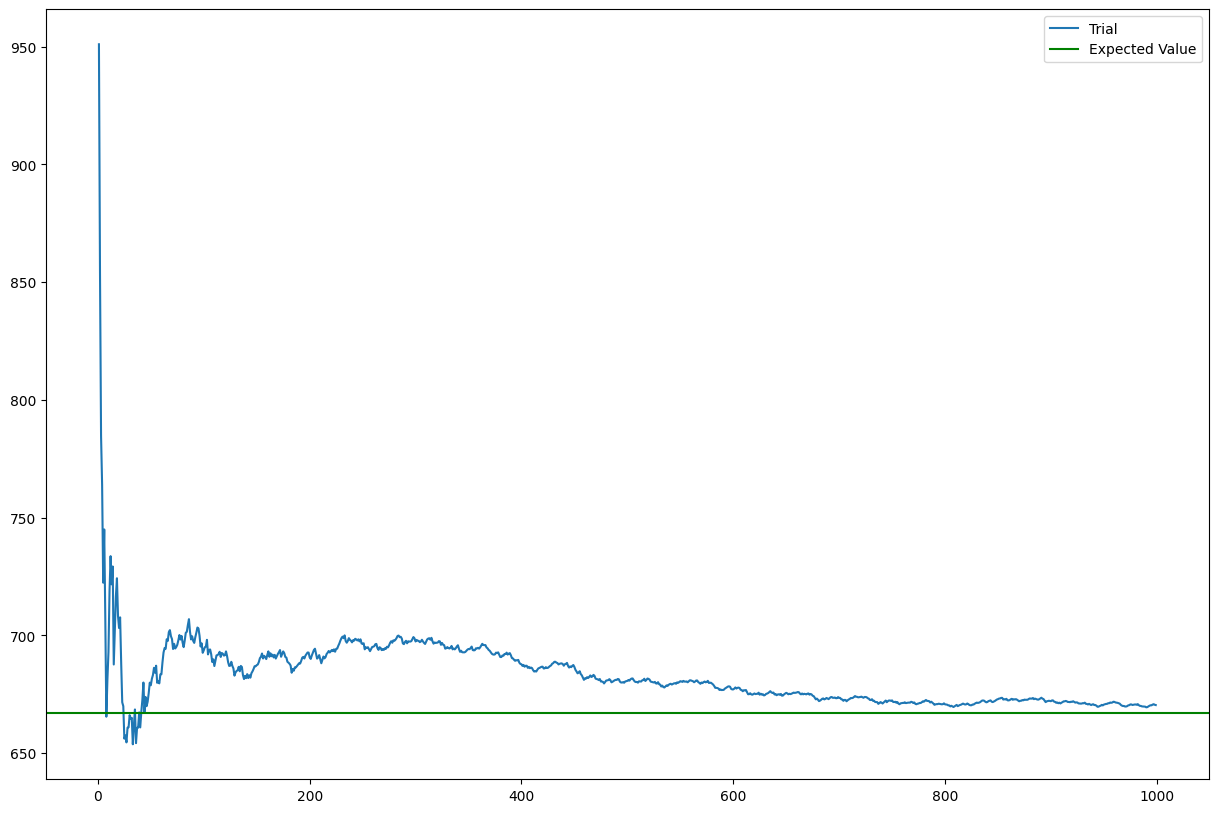

In [576]:
# TODO 10
n_faces = 1000
# YOUR CODE HERE
not_fair_distribution = np.array([x for x in range(1, n_faces + 1)])
NotFairDandDdice = Dice([x for x in range(1, n_faces + 1)], not_fair_distribution/sum(not_fair_distribution))
plot_approximation_error(NotFairDandDdice, m=1000)

Expected value of the fair dice is     : 3.50
Empirical average of the fair dice is     : 3.57


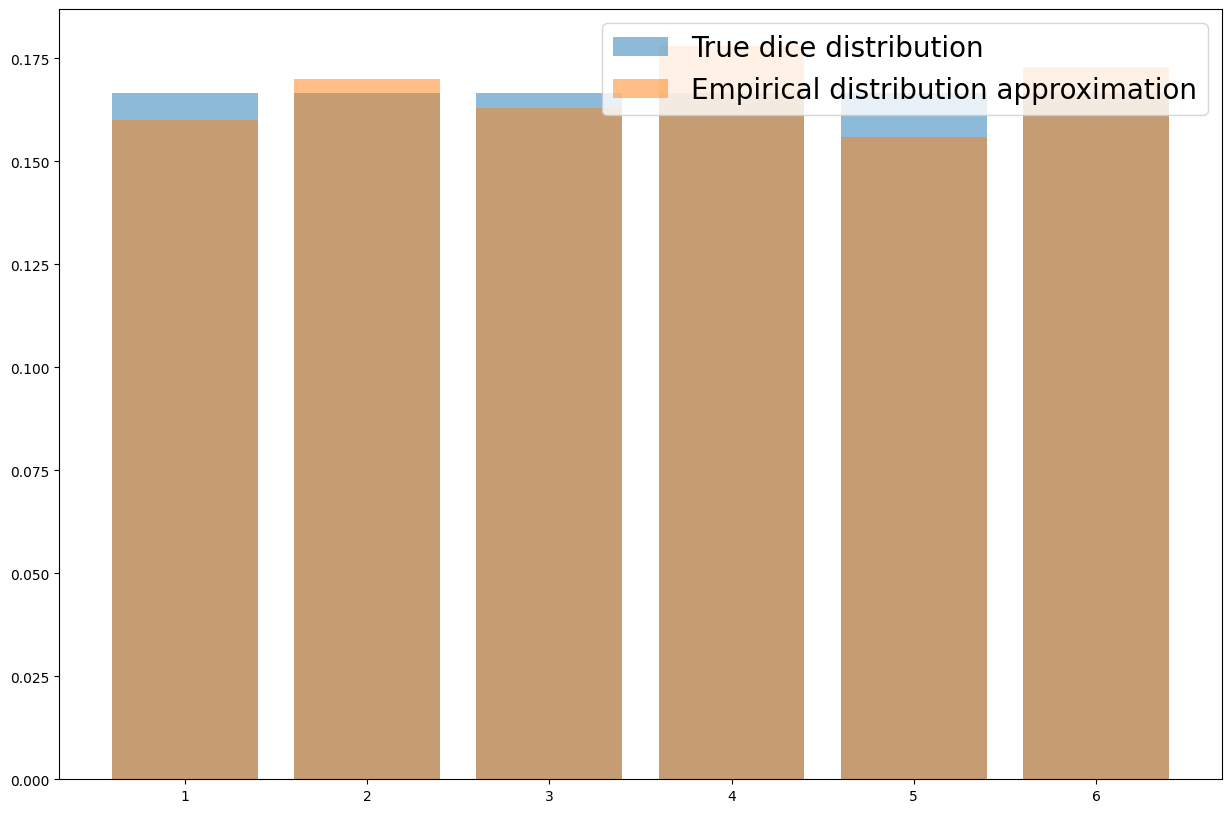

In [577]:
# Let's compare the bin's distribution 
m = 1000
bins = np.linspace(dice.faces[0] - 0.5, dice.faces[-1] + 0.5, len(dice.faces) + 1)
binning_count, bins = np.histogram(dice.throw(m), bins)

# Normalize the counts to get approximate probabilities (since this is a discrete probability)
binning_count = binning_count / sum(binning_count)
plt.figure(figsize=(15, 10))

plt.bar(dice.faces, dice.distribution, alpha=0.5, label='True dice distribution')
plt.bar(dice.faces, binning_count, alpha=0.5, label='Empirical distribution approximation')
plt.legend(fontsize=20)

print(f"Expected value of the fair dice is     : {E(dice):.2f}")
n_throws = 1000
print(f"Empirical average of the fair dice is     : {empirical_E(dice, m=n_throws):.2f}")

### Lambda functions

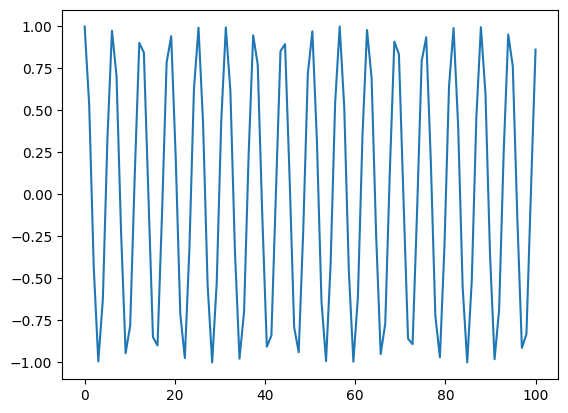

In [578]:
# TODO 11
# Create your own lambda function which applies cosine to a numpy array and return it
# Test the lambda function printing some values and plot cos(x) using plt.plot and your lambda
# function = # Add your code here
# YOUR CODE HERE
x = np.linspace(0, 100, 100)
function = lambda x : np.cos(x)

plt.plot(x, function(x))

In [579]:
assert np.isclose(function(0.), 1.)
assert np.isclose(function(np.pi/2), 0.)

### Fast and slow code 

Below we show how to use decorators to increase the functionalities of a function without implementing it from scratch. Say you have built your own complex function, call it F. Unfortunately you forgot to implement a marginal functionality such as a time or memory consumption meter (or e.g. some data preprocessing). Using a decorator you can extend the functionalities of your function wihtout changing its implementation nor its signature (inputs). You can simply specify what are the new lines of code that must be performed before and/or after your function and place them into a decorator. Then you just need to add the decorator syntax when you define the function F. This comes handy in the case you are not willing to change your function implementation to preserve compatibility with an old codebase.

This is an 'advanced' python topic, we do not require you to know what is happening under the hood. Nonetheless try to remember the existence of decorators since we will need them later in the labs.

`*args` is used to pass a non-keyworded, variable-length argument list, for example `('1', '2', '3')`.

`**kwargs ` is used to pass a keyworded, variable-length argument list, for example `(a='1', b='2', c='3')`.

In [580]:
# Check time needed to run the 2 functions.

def measure_time(function):
    def wrapper(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        print(f"Function: {function.__name__} \nwith args: [{args}, {kw}], \ntook {t_end - t_start:.5f} seconds")
        return result
    return wrapper


@measure_time
def expected_value_f_py(f, dice : Dice):
    '''Same doc string as before'''
    return sum([f(i)*p for i, p in zip(dice.faces, dice.distribution)])

# the same as: expected_value_f_py = measure_time(expected_value_f_py)


@measure_time
def expected_value_f_np(f, dice : Dice):
    '''Same doc string as before'''
    return np.dot(f(np.array(dice.faces)), dice.distribution)


# To wrap up, say someone gave you a python decorator, in order to use it you only need to place it before the 
# function definition (using the proper python syntax)

In [581]:
# TODO 12
# Use the decorator to decorate your own implementation of 'expected_value_f' and compare it with the running time of 
# functions defined in the previous cell

# YOUR CODE HERE
@measure_time
def expected_value_f(f, dice : Dice):
    '''
    Computing expected value of a general function applied to the faces (from 1 to F) of a dice. Implemeted using the 
    class Dice
    :param f: function to be applied to the random variable
    :param dice: Dice object 
    :return average: expected value of the dice
    '''
    # YOUR CODE HERE
    # we're trying to calculate E[f(x)] here 
    summation = 0 
    for x in range(len(dice.faces)):
        summation += (dice.distribution[x])*(f(dice.faces[x]))
    
    return summation


In [582]:
# Let's measure the time it takes to run the functions we wrote 
n_faces, N, T = 600000, 100, 10000
dice = Dice([x for x in range(1, n_faces + 1)])

In [583]:
expected_value_f(np.log, dice)

Function: expected_value_f 
with args: [(<ufunc 'log'>, <__main__.Dice object at 0x000001EF03BCA948>), {}], 
took 0.70052 seconds


12.304697552999986

In [584]:
expected_value_f_py(np.log, dice)

Function: expected_value_f_py 
with args: [(<ufunc 'log'>, <__main__.Dice object at 0x000001EF03BCA948>), {}], 
took 0.65930 seconds


12.304697552999986

In [585]:
expected_value_f_np(np.log, dice)

Function: expected_value_f_np 
with args: [(<ufunc 'log'>, <__main__.Dice object at 0x000001EF03BCA948>), {}], 
took 0.04351 seconds


12.304697553000182